# Data Acquisition

In [1]:
import pandas as pd

file_path = r"D:\Placement Preparation\Self Online Internship\Stock Price Prediction\TESLA.csv"
data = pd.read_csv(file_path)

print("Dataset preview:")
display(data.head())

print("\nDataset shape:", data.shape)

print("\nDataset info:")
data.info()

print("\nMissing values in each column:")
print(data.isnull().sum())


Dataset preview:


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500



Dataset shape: (3637, 8)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3637 non-null   int64  
 1   Date        3637 non-null   object 
 2   Open        3637 non-null   float64
 3   High        3637 non-null   float64
 4   Low         3637 non-null   float64
 5   Close       3637 non-null   float64
 6   Adj Close   3637 non-null   float64
 7   Volume      3637 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 227.4+ KB

Missing values in each column:
Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64


# Data Preprocessing

In [2]:
print("Missing values before preprocessing:")
print(data.isnull().sum())

data = data.ffill()

print("\nMissing values after handling:")
print(data.isnull().sum())

print("\nChecking for duplicate rows...")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

if 'Date' in data.columns:
    try:
        
        data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='coerce')
        # Check for parsing errors
        if data['Date'].isnull().sum() > 0:
            print("\nWarning: Some dates could not be parsed. Check the following rows:")
            display(data[data['Date'].isnull()])
        else:
            print("\nAll dates have been successfully parsed.")
    except Exception as e:
        print(f"\nError occurred while parsing dates: {e}")
else:
    print("\nError: 'Date' column not found in the dataset.")

if 'Date' in data.columns:
    data.sort_values(by='Date', inplace=True)
    data.reset_index(drop=True, inplace=True)
    print("Dataset sorted by date.")

required_columns = ['Date', 'Close']  
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"\nError: Missing essential columns {missing_columns} in the dataset!")
else:
    print("\nAll essential columns are present in the dataset.")

print("\nCleaned dataset preview:")
display(data.head())

print("\nFinal dataset shape:", data.shape)


Missing values before preprocessing:
Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

Missing values after handling:
Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

Checking for duplicate rows...
Number of duplicate rows: 0



,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,NaT,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,NaT,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,NaT,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,NaT,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,NaT,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,NaT,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,NaT,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,NaT,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,NaT,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


Dataset sorted by date.

All essential columns are present in the dataset.

Cleaned dataset preview:


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,NaT,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,NaT,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,NaT,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,NaT,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,NaT,1.333333,1.333333,1.055333,1.074000,1.074000,103003500



Final dataset shape: (3637, 8)


# Exploratory Data Analysis

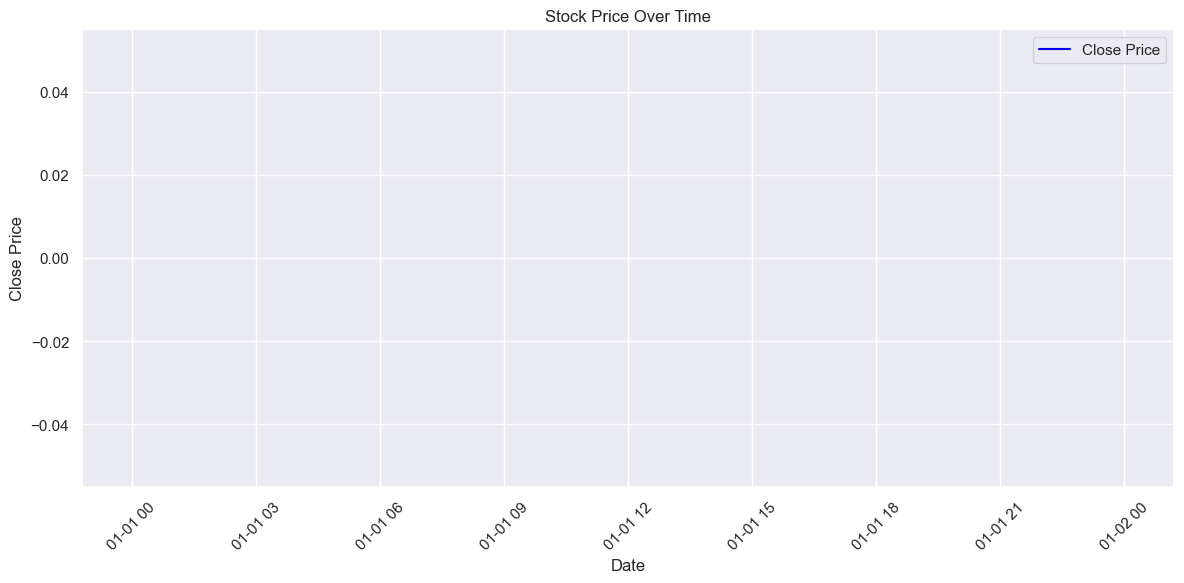


Descriptive Statistics of the Closing Price:
count    3637.000000
mean       80.067952
std       105.409448
min         1.053333
25%        12.065333
50%        17.846666
75%       176.880005
max       409.970001
Name: Close, dtype: float64


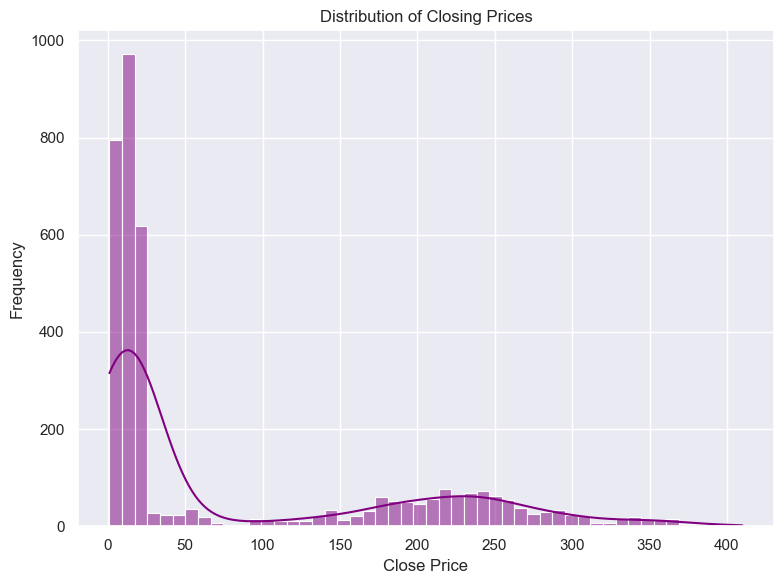

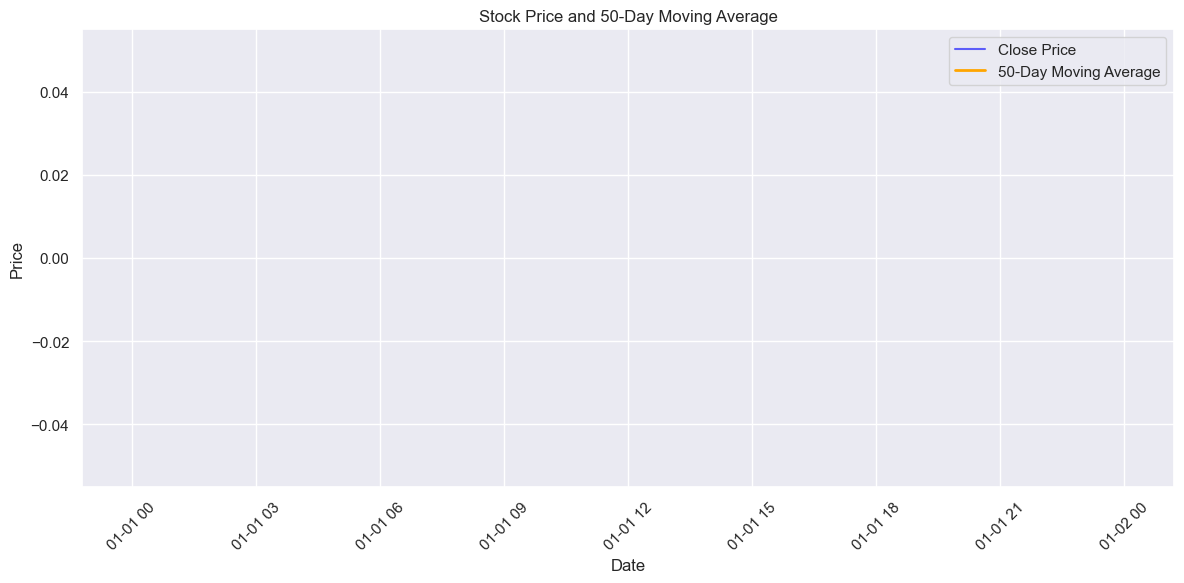

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics of the Closing Price:")
print(data['Close'].describe())

plt.figure(figsize=(8,6))
sns.histplot(data['Close'], bins=50, kde=True, color='purple')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

data['50_day_MA'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['50_day_MA'], label='50-Day Moving Average', color='orange', linewidth=2)
plt.title('Stock Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Stationary

In [4]:
!pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


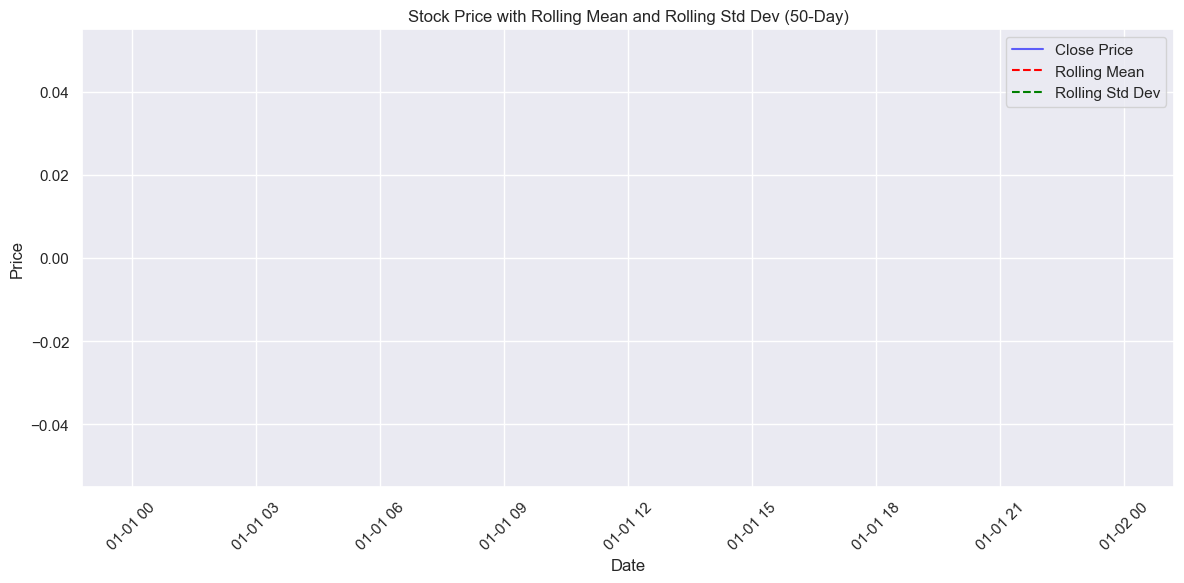


Performing Augmented Dickey-Fuller (ADF) Test...

ADF Test Results:
ADF Statistic: -0.14443766126985774
p-value: 0.9448285236295072
Critical Values: {'1%': -3.4321642389337907, '5%': -2.862341629305848, '10%': -2.5671967199233476}

The series is not stationary (fail to reject the null hypothesis).


In [5]:

from statsmodels.tsa.stattools import adfuller

window = 50 

rolling_mean = data['Close'].rolling(window=window).mean()
rolling_std = data['Close'].rolling(window=window).std()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], rolling_mean, label='Rolling Mean', color='red', linestyle='--')
plt.plot(data['Date'], rolling_std, label='Rolling Std Dev', color='green', linestyle='--')
plt.title(f'Stock Price with Rolling Mean and Rolling Std Dev ({window}-Day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nPerforming Augmented Dickey-Fuller (ADF) Test...")

adf_result = adfuller(data['Close'].dropna())  
print("\nADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

if adf_result[1] <= 0.05:
    print("\nThe series is stationary (reject the null hypothesis).")
else:
    print("\nThe series is not stationary (fail to reject the null hypothesis).")


# Model Selection

Mean Squared Error (MSE): 16856.91128666182
Root Mean Squared Error (RMSE): 129.8341684097904


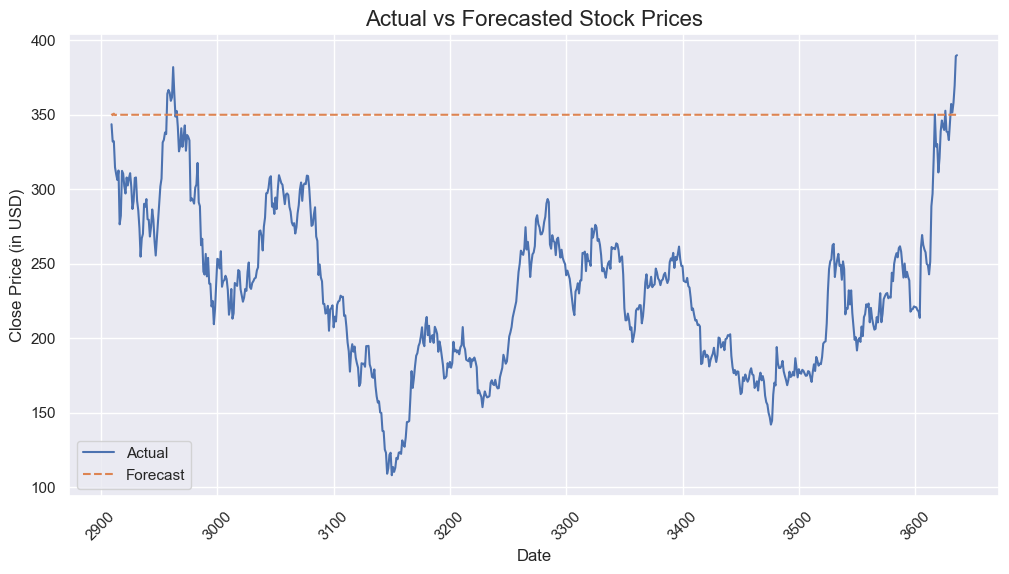

In [6]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

model = ARIMA(train, order=(5, 1, 0))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test)) 

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)  

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (in USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Model Training 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2909
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7698.158
Date:                Thu, 16 Jan 2025   AIC                          15408.316
Time:                        16:16:06   BIC                          15444.167
Sample:                             0   HQIC                         15421.232
                               - 2909                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0300      0.006     -5.357      0.000      -0.041      -0.019
ar.L2         -0.0017      0.006     -0.286      0.775      -0.013       0.010
ar.L3          0.0360      0.007      4.975      0.0

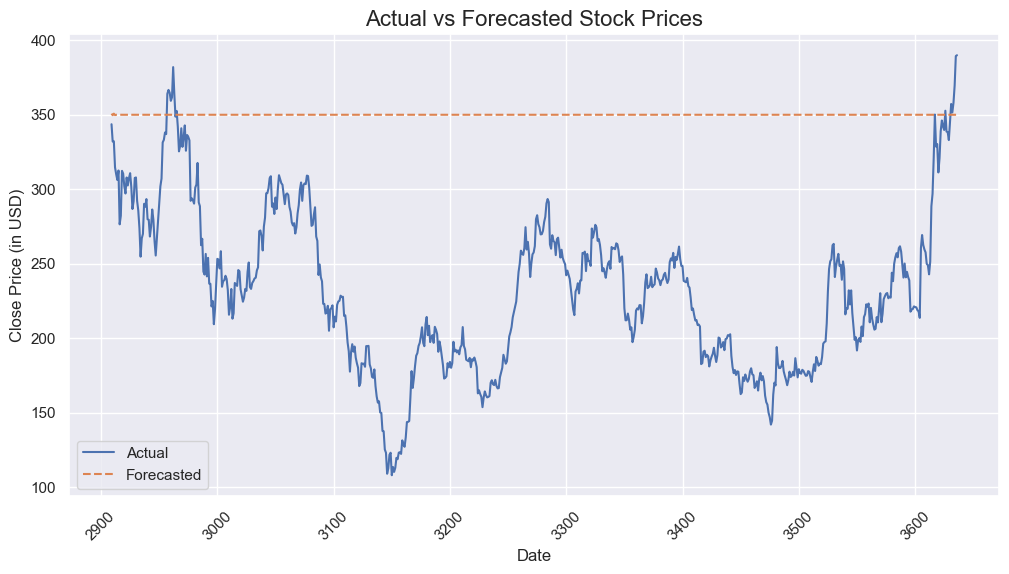

In [7]:

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5, 1, 0))  
model_fit = model.fit()  

print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecasted', linestyle='--')
plt.title('Actual vs Forecasted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (in USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Model Evaluation

Mean Squared Error (MSE): 16856.91128666182
Root Mean Squared Error (RMSE): 129.8341684097904
Mean Absolute Error (MAE): 119.19472475072557


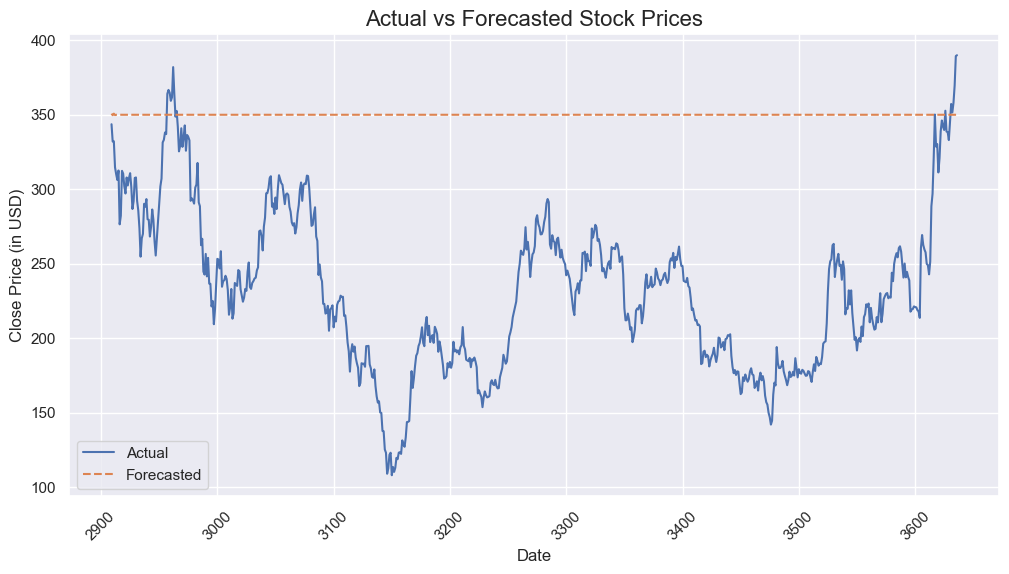

In [8]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(test, forecast) 

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecasted', linestyle='--')
plt.title('Actual vs Forecasted Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (in USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Model Deployement

In [9]:

import joblib

joblib.dump(model_fit, 'arima_model.pkl')

print("Model has been saved successfully.")


Model has been saved successfully.


In [10]:

loaded_model = joblib.load('arima_model.pkl')

forecast_new = loaded_model.forecast(steps=5)

print("Forecast for the next 5 days:", forecast_new)


Forecast for the next 5 days: 2909    350.582932
2910    349.555131
2911    350.620502
2912    349.637936
2913    349.837770
Name: predicted_mean, dtype: float64
